In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving epa-sea-level.csv to epa-sea-level.csv
User uploaded file "epa-sea-level.csv" with length 5912 bytes


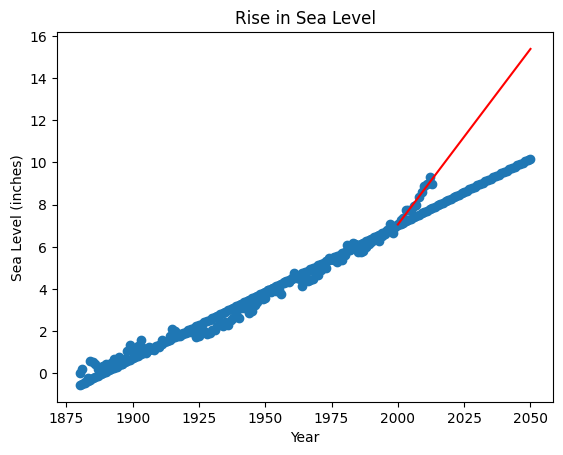

In [3]:
# Read data from file
df = pd.read_csv('epa-sea-level.csv')

# Create scatter plot
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
plt.scatter(x, y)

# Create first line of best fit
regr1 = linregress(x, y)
x1 = pd.Series([i for i in range(1880,2051)])
y1 = regr1.intercept + regr1.slope * x1
plt.plot(x1 , y1 , 'o', label='1880-2050 predict')

# Create second line of best fit
df_year = df[df['Year'] >= 2000]
regr2 = linregress(df_year['Year'], df_year['CSIRO Adjusted Sea Level'])
x2 = pd.Series([i for i in range(2000,2051)])
y2 = regr2.intercept + regr2.slope * x2
plt.plot(x2, y2, 'r', label= '2000-2050 predict')

# Add labels and title
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

# Save plot and return data for testing (DO NOT MODIFY)
plt.savefig('sea_level_plot.png')
# return plt.gca()